In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_excel("origin/Concrete_Data.xls")
columns = df.columns
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### change column name

In [3]:
# new_col = []
# for col in columns:
#     df = df.rename(columns={col: col.split(" ")[0]})
#     new_col.append(col.split(" ")[0])
    
df = pd.concat(map(lambda col: df[col].rename(col.split(" ")[0]), columns), axis=1)
df.columns

Index(['Cement', 'Blast', 'Fly', 'Water', 'Superplasticizer', 'Coarse', 'Fine',
       'Age', 'Concrete'],
      dtype='object')

In [4]:
df.head(5)

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Concrete
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### check null values

In [5]:
df.isnull().sum().to_frame().T

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Concrete
0,0,0,0,0,0,0,0,0,0


### draw histogram of features

In [19]:
def show_hist(s: pd.Series, col: str):
    plt.figure()
    plt.title(col)
    if isinstance(s, pd.Series):
        s.hist(bins=100)
    else:
        pd.Series(s.reshape(-1), name=col).hist(bins=100)
    plt.show()

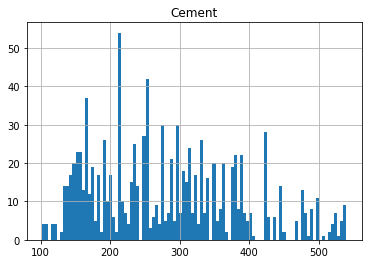

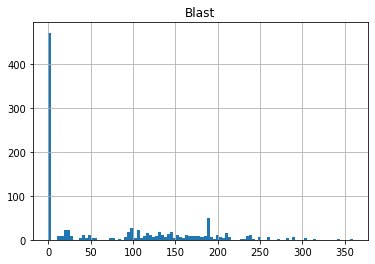

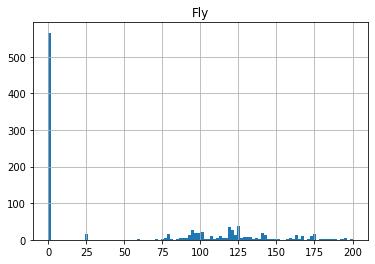

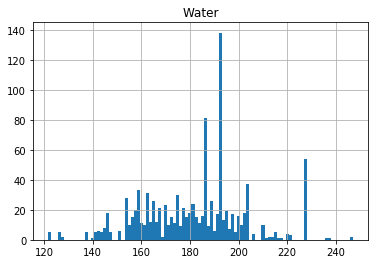

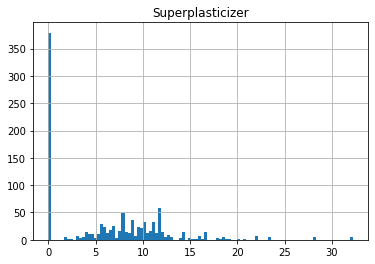

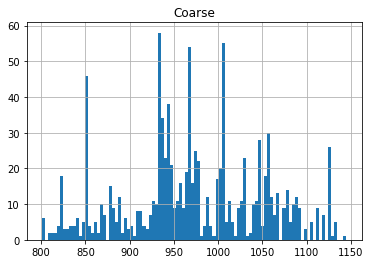

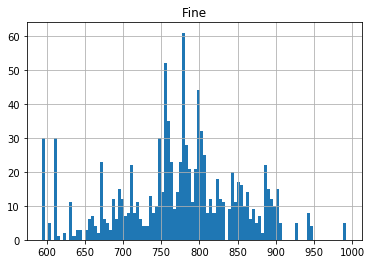

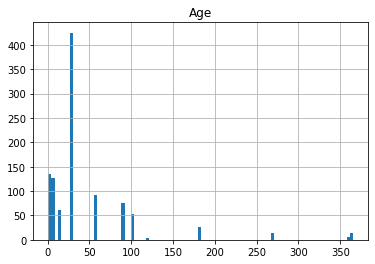

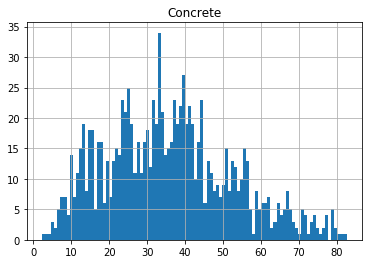

In [20]:
for col in df.columns:
    show_hist(df[col], col)

### Count Zero

In [8]:
zero = df.applymap(lambda x: x == 0.0)
zero.sum().to_frame().T

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Concrete
0,0,466,566,0,379,0,0,0,0


In [9]:
zero_count = zero.apply(lambda row: row.sum(), axis=1)
zero_count.apply(lambda x: x == 3).sum()

209

### Regression Coef

In [10]:
beta = pd.read_csv("result/baseline/beta.csv", index_col=0)
beta

,beta
column,
Cement,0.102615
Blast,0.087667
Fly,0.070557
Water,-0.237636
Superplasticizer,0.174586
Coarse,0.001949
Fine,0.000539
Age,0.111609
intercept,31.332524


### Histogram of processed features

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, PowerTransformer, QuantileTransformer

def process(data):
    tf = QuantileTransformer(n_quantiles=100, output_distribution='normal')
    # tf1 = MinMaxScaler()
    # processed = tf2.fit_transform(tf1.fit_transform(data.values.reshape(-1, 1)))
    processed = tf.fit_transform(data.values.reshape(-1, 1))
    return processed

In [ ]:
columns = df.columns

In [ ]:
processed = map(lambda col: (process(df[col]), col) , columns)
series = map(lambda p: pd.Series(p[0].reshape(-1), name=p[1]) , processed)
processed_df = pd.concat(series, axis=1)

In [ ]:
for col in columns:
    show_hist(processed_df[col], col)